In this notebook, I will focus on the various callset parameters, such as DP to see why the number of het sites called in males appear.

In [1]:
#Initial configuration, probably overkill in imports.
import sys, os, re
import numpy as np
import pandas as pd
import allel
import zarr
import dask
import numcodecs
import warnings
from pathlib import Path


%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("notebook")

#Dask setup
from multiprocessing.pool import ThreadPool
import dask
dask.config.set(pool=ThreadPool(int(os.environ['SLURM_CPUS_PER_TASK'])))

In [2]:
#Opening the zarr data
callset = zarr.open_group('/faststorage/project/primatediversity/people/kmt/baboon_flagship/steps/callset.zarr', mode='r')
callset.tree(expand=False)

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, name='chr1', nodes=(Node(disabled=True, n…

In [3]:
chromosomes = [f'chr{x}' for x in range(1, 21)] + ['chrX']
meta_data = pd.read_excel('../data/Papio-Genomes_JR_120720_MR-CR-KM_geoloc.xlsx')
baboon_samples = [x for x in meta_data.PGDP_ID if x.startswith('PD')] #  NB: to not get the SciAdvPaper samples
#Meta data for the sample present in the zarr data structure - Kasper has removed some of the samples.
samples_list = list(callset['chr1/samples'][:])
meta_data_samples = meta_data.loc[meta_data.PGDP_ID.isin(samples_list)].copy()
samples_callset_index = [samples_list.index(s) for s in meta_data_samples.PGDP_ID]
meta_data_samples['callset_index'] = samples_callset_index

In [4]:
meta_data_samples

,Unnamed: 0,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index
1,1,PD_0199,09SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,0
2,2,PD_0200,11SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,1
3,3,PD_0201,19SNM1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",M,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,2
4,4,PD_0202,20SNF1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,3
5,5,PD_0203,21SNF1151115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,4
...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,PD_0789,34417_BZ11064,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,155
213,213,PD_0790,34418_BZ11065,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,156
214,214,PD_0791,34419_BZ11066,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,157
215,215,PD_0792,34420_BZ11067,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,158


In [12]:
vcf_dir = "/faststorage/project/primatediversity/data/variants/"
vcf_suffix = ".variable.filtered.HF.snps.vcf.gz"
metainfo = "data/New_Papio.xlsx"
ID = ID = "PD_0201"
callset_vcf_PD_0201 = allel.read_vcf(vcf_dir+ID+vcf_suffix, region="chrX", fields=['calldata/GT', 'calldata/DP',
                                                                    'variants/DP'])
callset_vcf_PD_0201

{'calldata/DP': array([[12],
        [17],
        [18],
        ...,
        [21],
        [21],
        [20]], dtype=int16),
 'calldata/GT': array([[[1, 1]],
 
        [[1, 1]],
 
        [[1, 1]],
 
        ...,
 
        [[1, 1]],
 
        [[1, 1]],
 
        [[1, 1]]], dtype=int8),
 'variants/DP': array([12, 17, 18, ..., 21, 21, 20], dtype=int32)}

In [13]:
ID = ID = "PD_0202"
callset_vcf_PD_0202 = allel.read_vcf(vcf_dir+ID+vcf_suffix, region="chrX", fields=['calldata/GT', 'calldata/DP'])
callset_vcf_PD_0202

{'calldata/DP': array([[21],
        [28],
        [29],
        ...,
        [31],
        [27],
        [22]], dtype=int16),
 'calldata/GT': array([[[1, 1]],
 
        [[1, 1]],
 
        [[1, 1]],
 
        ...,
 
        [[0, 1]],
 
        [[0, 1]],
 
        [[0, 1]]], dtype=int8)}

In [14]:
#There is a difference between calldata DP and variants DP.
#I am not an expert on mapping, so this seems be due to variation in read quality and mapping criteria.
#To be consistent, i am going to use calldata, which is taken from the FORMAT field, and is the ones passing.
print(callset_vcf_PD_0201['variants/DP'].sum())
print(callset_vcf_PD_0201['calldata/DP'].sum())

22329824
21852002


In [41]:
gt_PD_0201 = allel.GenotypeArray(callset_vcf_PD_0201["calldata/GT"])
gt_PD_0202 = allel.GenotypeArray(callset_vcf_PD_0202["calldata/GT"])

In [42]:
dp_201 = callset_vcf_PD_0201['calldata/DP']
dp_202= callset_vcf_PD_0202['calldata/DP']

In [43]:
#Analysis for 201, which is a male
het_or_not = gt_PD_0201.is_het()
het = []
not_het = []
for i in range(len(het_or_not)): #Changing it to index positions, the bool was troublesome.
    if het_or_not[i] == True:
        het.append(i)
    else:
        not_het.append(i)
    if i % 100000 == 0:
        print(i)
hom = []
hom_or_not = gt_PD_0201.is_hom()
for i in range(len(hom_or_not)): #Changing it to index positions, the bool was troublesome.
    if hom_or_not[i] == True:
        hom.append(i)
    if i % 100000 == 0:
        print(i)

het_sites = gt_PD_0201.take(het, axis = 0)
hom_sites = gt_PD_0201.take(not_het, axis = 0)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000


dp    27.140836
dtype: float64

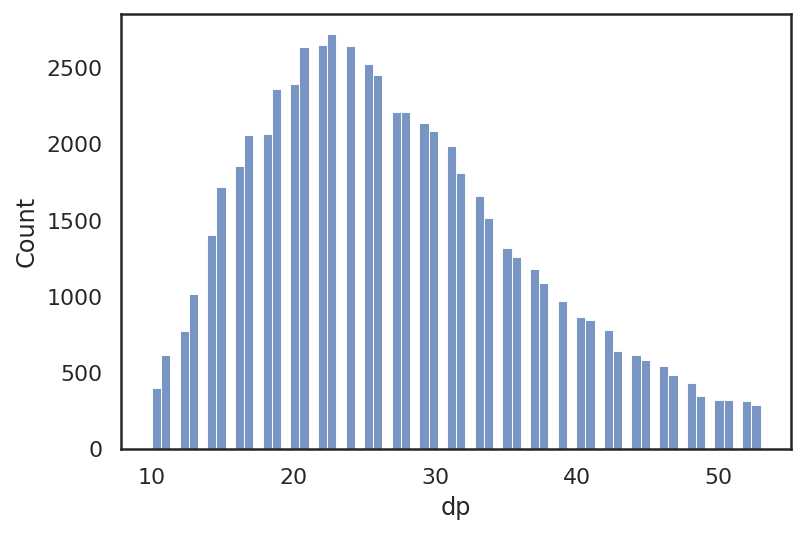

In [44]:
dp_het = dp_201.take(het, axis = 0)
dp_het =  pd.DataFrame(dp_het, columns = ["dp"])
hist = sns.histplot(dp_het, x = "dp")
dp_het.mean()

dp    16.249478
dtype: float64

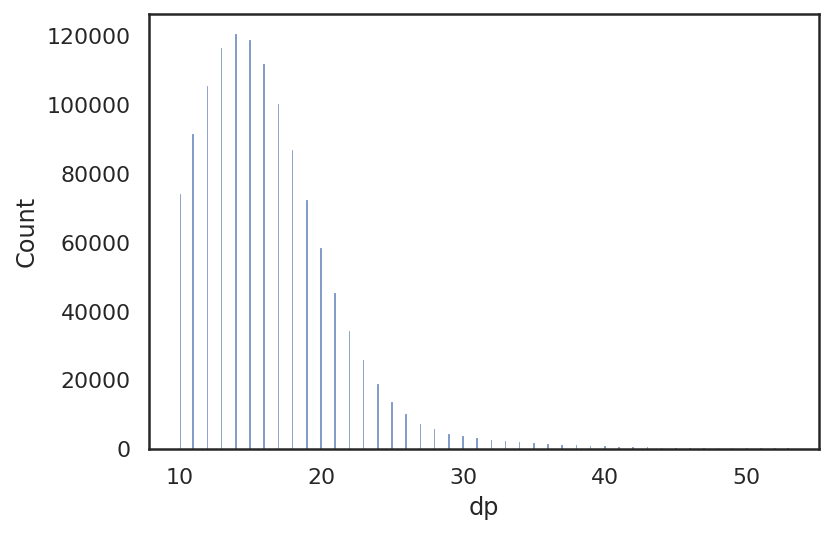

In [45]:
dp_hom = dp_201.take(hom, axis = 0)
dp_hom =  pd.DataFrame(dp_hom, columns = ["dp"])
hist = sns.histplot(dp_hom, x = "dp")
dp_hom.mean()

In [46]:
#Analysis for 202, which is a female
het_or_not = gt_PD_0202.is_het()
het = []
not_het = []
for i in range(len(het_or_not)): #Changing it to index positions, the bool was troublesome.
    if het_or_not[i] == True:
        het.append(i)
    else:
        not_het.append(i)
    if i % 100000 == 0:
        print(i)
hom = []
hom_or_not = gt_PD_0202.is_hom()
for i in range(len(hom_or_not)): #Changing it to index positions, the bool was troublesome.
    if hom_or_not[i] == True:
        hom.append(i)
    if i % 100000 == 0:
        print(i)

het_sites = gt_PD_0202.take(het, axis = 0)
hom_sites = gt_PD_0202.take(not_het, axis = 0)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000


dp    32.008339
dtype: float64

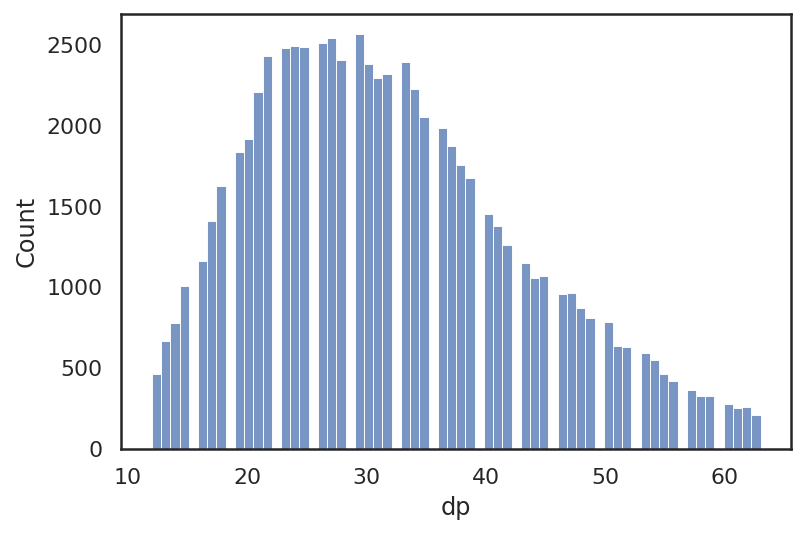

In [47]:
dp_het = dp_202.take(het, axis = 0)
dp_het =  pd.DataFrame(dp_het, columns = ["dp"])
hist = sns.histplot(dp_het, x = "dp")
dp_het.mean()

dp    18.680925
dtype: float64

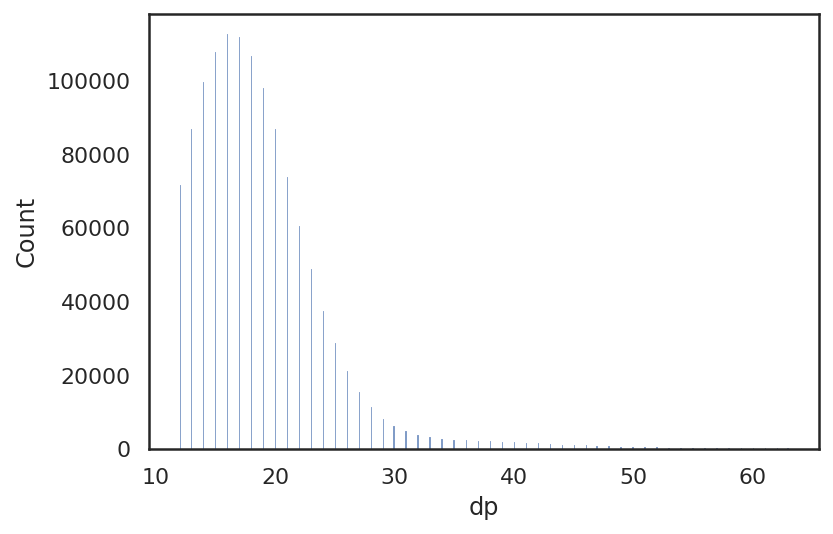

In [48]:
dp_hom = dp_202.take(hom, axis = 0)
dp_hom =  pd.DataFrame(dp_hom, columns = ["dp"])
hist = sns.histplot(dp_hom, x = "dp")
dp_hom.mean()